In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('banknotes.csv')

In [3]:
data.shape

(1372, 5)

In [4]:
X=data.drop('Class',axis=1)   #X=data.iloc[:,0:4]

In [5]:
y=data.iloc[:,-1]   #y=data['Class']

In [6]:
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
set(y)

{0, 1}

In [9]:
X.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [12]:
len(X_train)

1029

In [13]:
len(X_test)

343

In [14]:
X_train.head()

,Variance,Skewness,Curtosis,Entropy
662,2.9736,8.7944,-3.6359,-1.375400
512,2.6648,10.7540,-3.3994,-4.168500
1193,-3.7573,-8.2916,10.3032,0.380590
682,3.7321,-3.8840,3.3577,-0.006049
1313,-1.5078,-7.3191,7.8981,1.228900


In [42]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred=classifier.predict(X_test)

In [44]:
result=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [45]:
result.head()

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0


In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[195,   0],
       [  0, 148]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       195
          1       1.00      1.00      1.00       148

avg / total       1.00      1.00      1.00       343



In [51]:
accuracy_score(y_test,y_pred)*100

100.0

[Text(0,0.5,'Original'), Text(0,1.5,'Fake')]

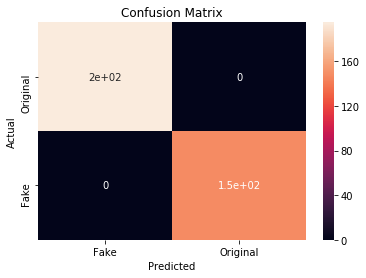

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
#annot=True to annotate cells

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Fake','Original'])
ax.yaxis.set_ticklabels(['Original','Fake'])


In [53]:
new=[[-2.0285,3.8468,-0.63435,-1.175]]
if classifier.predict(new)[0]==1:
    print("Original Note")
else:
    print("Fake Note")

Original Note
